In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 读取

In [2]:
train_kernel = pd.read_csv('../../数据/已有/memory_sample_kernel_log_round1_a_train.csv')
train_failure = pd.read_csv('../../数据/已有/memory_sample_failure_tag_round1_a_train.csv')
test_kernel = pd.read_csv('../../数据/已有/memory_sample_kernel_log_k12_test.csv')

# 预处理
- 合并两表
- 数据清洗
  - 去重(记录重复)
  - 去空(插值法)
  - 去异常()
  - 去相似列(spearman,降维)
- 特征工程
  - 报错时间
  - 是否报错

# 基本信息

In [3]:
train_kernel.keys(),train_failure.keys(),test_kernel.keys()

(Index(['collect_time', '1_hwerr_f', '1_hwerr_e', '2_hwerr_c', '2_sel',
        '3_hwerr_n', '2_hwerr_s', '3_hwerr_m', '1_hwerr_st', '1_hw_mem_c',
        '3_hwerr_p', '2_hwerr_ce', '3_hwerr_as', '1_ke', '2_hwerr_p',
        '3_hwerr_kp', '1_hwerr_fl', '3_hwerr_r', '_hwerr_cd', '3_sup_mce_note',
        '3_cmci_sub', '3_cmci_det', '3_hwerr_pi', '3_hwerr_o', '3_hwerr_mce_l',
        'serial_number', 'manufacturer', 'vendor'],
       dtype='object'),
 Index(['serial_number', 'failure_time', 'tag', 'manufacturer', 'vendor'], dtype='object'),
 Index(['collect_time', '1_hwerr_f', '1_hwerr_e', '2_hwerr_c', '2_sel',
        '3_hwerr_n', '2_hwerr_s', '3_hwerr_m', '1_hwerr_st', '1_hw_mem_c',
        '3_hwerr_p', '2_hwerr_ce', '3_hwerr_as', '1_ke', '2_hwerr_p',
        '3_hwerr_kp', '1_hwerr_fl', '3_hwerr_r', '_hwerr_cd', '3_sup_mce_note',
        '3_cmci_sub', '3_cmci_det', '3_hwerr_pi', '3_hwerr_o', '3_hwerr_mce_l',
        'serial_number', 'manufacturer', 'vendor'],
       dtype='object'))

# 拼接

In [4]:
data = pd.merge(train_kernel,train_failure.iloc[:,:3],'left','serial_number')
data.head()

,collect_time,1_hwerr_f,1_hwerr_e,2_hwerr_c,2_sel,3_hwerr_n,2_hwerr_s,3_hwerr_m,1_hwerr_st,1_hw_mem_c,...,3_cmci_sub,3_cmci_det,3_hwerr_pi,3_hwerr_o,3_hwerr_mce_l,serial_number,manufacturer,vendor,failure_time,tag
0,2019-01-14 18:19:01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,server_31576,0,1.0,2019-01-14 18:52:31,1.0
1,2019-01-14 18:20:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,server_31576,0,1.0,2019-01-14 18:52:31,1.0
2,2019-01-14 18:25:51,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,server_31576,0,1.0,2019-01-14 18:52:31,1.0
3,2019-01-14 18:29:57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,server_31576,0,1.0,2019-01-14 18:52:31,1.0
4,2019-01-14 18:32:08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,server_31576,0,1.0,2019-01-14 18:52:31,1.0


In [5]:
# 列排序
a = data['serial_number']
data.drop('serial_number',axis=1,inplace=True)
data.insert(0,'serial_number',a)

In [6]:
# 重复值
data.duplicated().sum()

954826

In [7]:
# 去重
data = data.drop_duplicates()
data.duplicated().sum()

0

In [8]:
# 空值
data.isna().sum()

serial_number           0
collect_time            0
1_hwerr_f         2556078
1_hwerr_e         2543728
2_hwerr_c         2555753
2_sel             2557038
3_hwerr_n         2557038
2_hwerr_s         2557038
3_hwerr_m         2557038
1_hwerr_st        2544590
1_hw_mem_c        1870110
3_hwerr_p         2550832
2_hwerr_ce        2547807
3_hwerr_as        2544761
1_ke              2532600
2_hwerr_p         2553082
3_hwerr_kp        2556712
1_hwerr_fl        2557038
3_hwerr_r         2557038
_hwerr_cd         2557038
3_sup_mce_note    1731165
3_cmci_sub        2556143
3_cmci_det        2555404
3_hwerr_pi        2553082
3_hwerr_o         2553084
3_hwerr_mce_l     2540998
manufacturer            0
vendor                  2
failure_time      2435730
tag               2435730
dtype: int64

In [9]:
# 去空
ft = data['failure_time']
data.drop('failure_time',axis=1,inplace=True)
data.fillna(0,inplace=True)
data.insert(1,'failure_time',ft)
data.isna().sum()

serial_number           0
failure_time      2435730
collect_time            0
1_hwerr_f               0
1_hwerr_e               0
2_hwerr_c               0
2_sel                   0
3_hwerr_n               0
2_hwerr_s               0
3_hwerr_m               0
1_hwerr_st              0
1_hw_mem_c              0
3_hwerr_p               0
2_hwerr_ce              0
3_hwerr_as              0
1_ke                    0
2_hwerr_p               0
3_hwerr_kp              0
1_hwerr_fl              0
3_hwerr_r               0
_hwerr_cd               0
3_sup_mce_note          0
3_cmci_sub              0
3_cmci_det              0
3_hwerr_pi              0
3_hwerr_o               0
3_hwerr_mce_l           0
manufacturer            0
vendor                  0
tag                     0
dtype: int64

In [10]:
# 规范列数值类型
for i in data.keys()[3:]:
    data.loc[:,i] = data.loc[:,i].astype('int')
data.info()

C:\Users\76406\AppData\Local\Temp\ipykernel_12672\4250674340.py:3: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:,i] = data.loc[:,i].astype('int')


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2557038 entries, 0 to 3511862
Data columns (total 30 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   serial_number   object
 1   failure_time    object
 2   collect_time    object
 3   1_hwerr_f       int32 
 4   1_hwerr_e       int32 
 5   2_hwerr_c       int32 
 6   2_sel           int32 
 7   3_hwerr_n       int32 
 8   2_hwerr_s       int32 
 9   3_hwerr_m       int32 
 10  1_hwerr_st      int32 
 11  1_hw_mem_c      int32 
 12  3_hwerr_p       int32 
 13  2_hwerr_ce      int32 
 14  3_hwerr_as      int32 
 15  1_ke            int32 
 16  2_hwerr_p       int32 
 17  3_hwerr_kp      int32 
 18  1_hwerr_fl      int32 
 19  3_hwerr_r       int32 
 20  _hwerr_cd       int32 
 21  3_sup_mce_note  int32 
 22  3_cmci_sub      int32 
 23  3_cmci_det      int32 
 24  3_hwerr_pi      int32 
 25  3_hwerr_o       int32 
 26  3_hwerr_mce_l   int32 
 27  manufacturer    int32 
 28  vendor          int32 
 29  tag           

<AxesSubplot: >

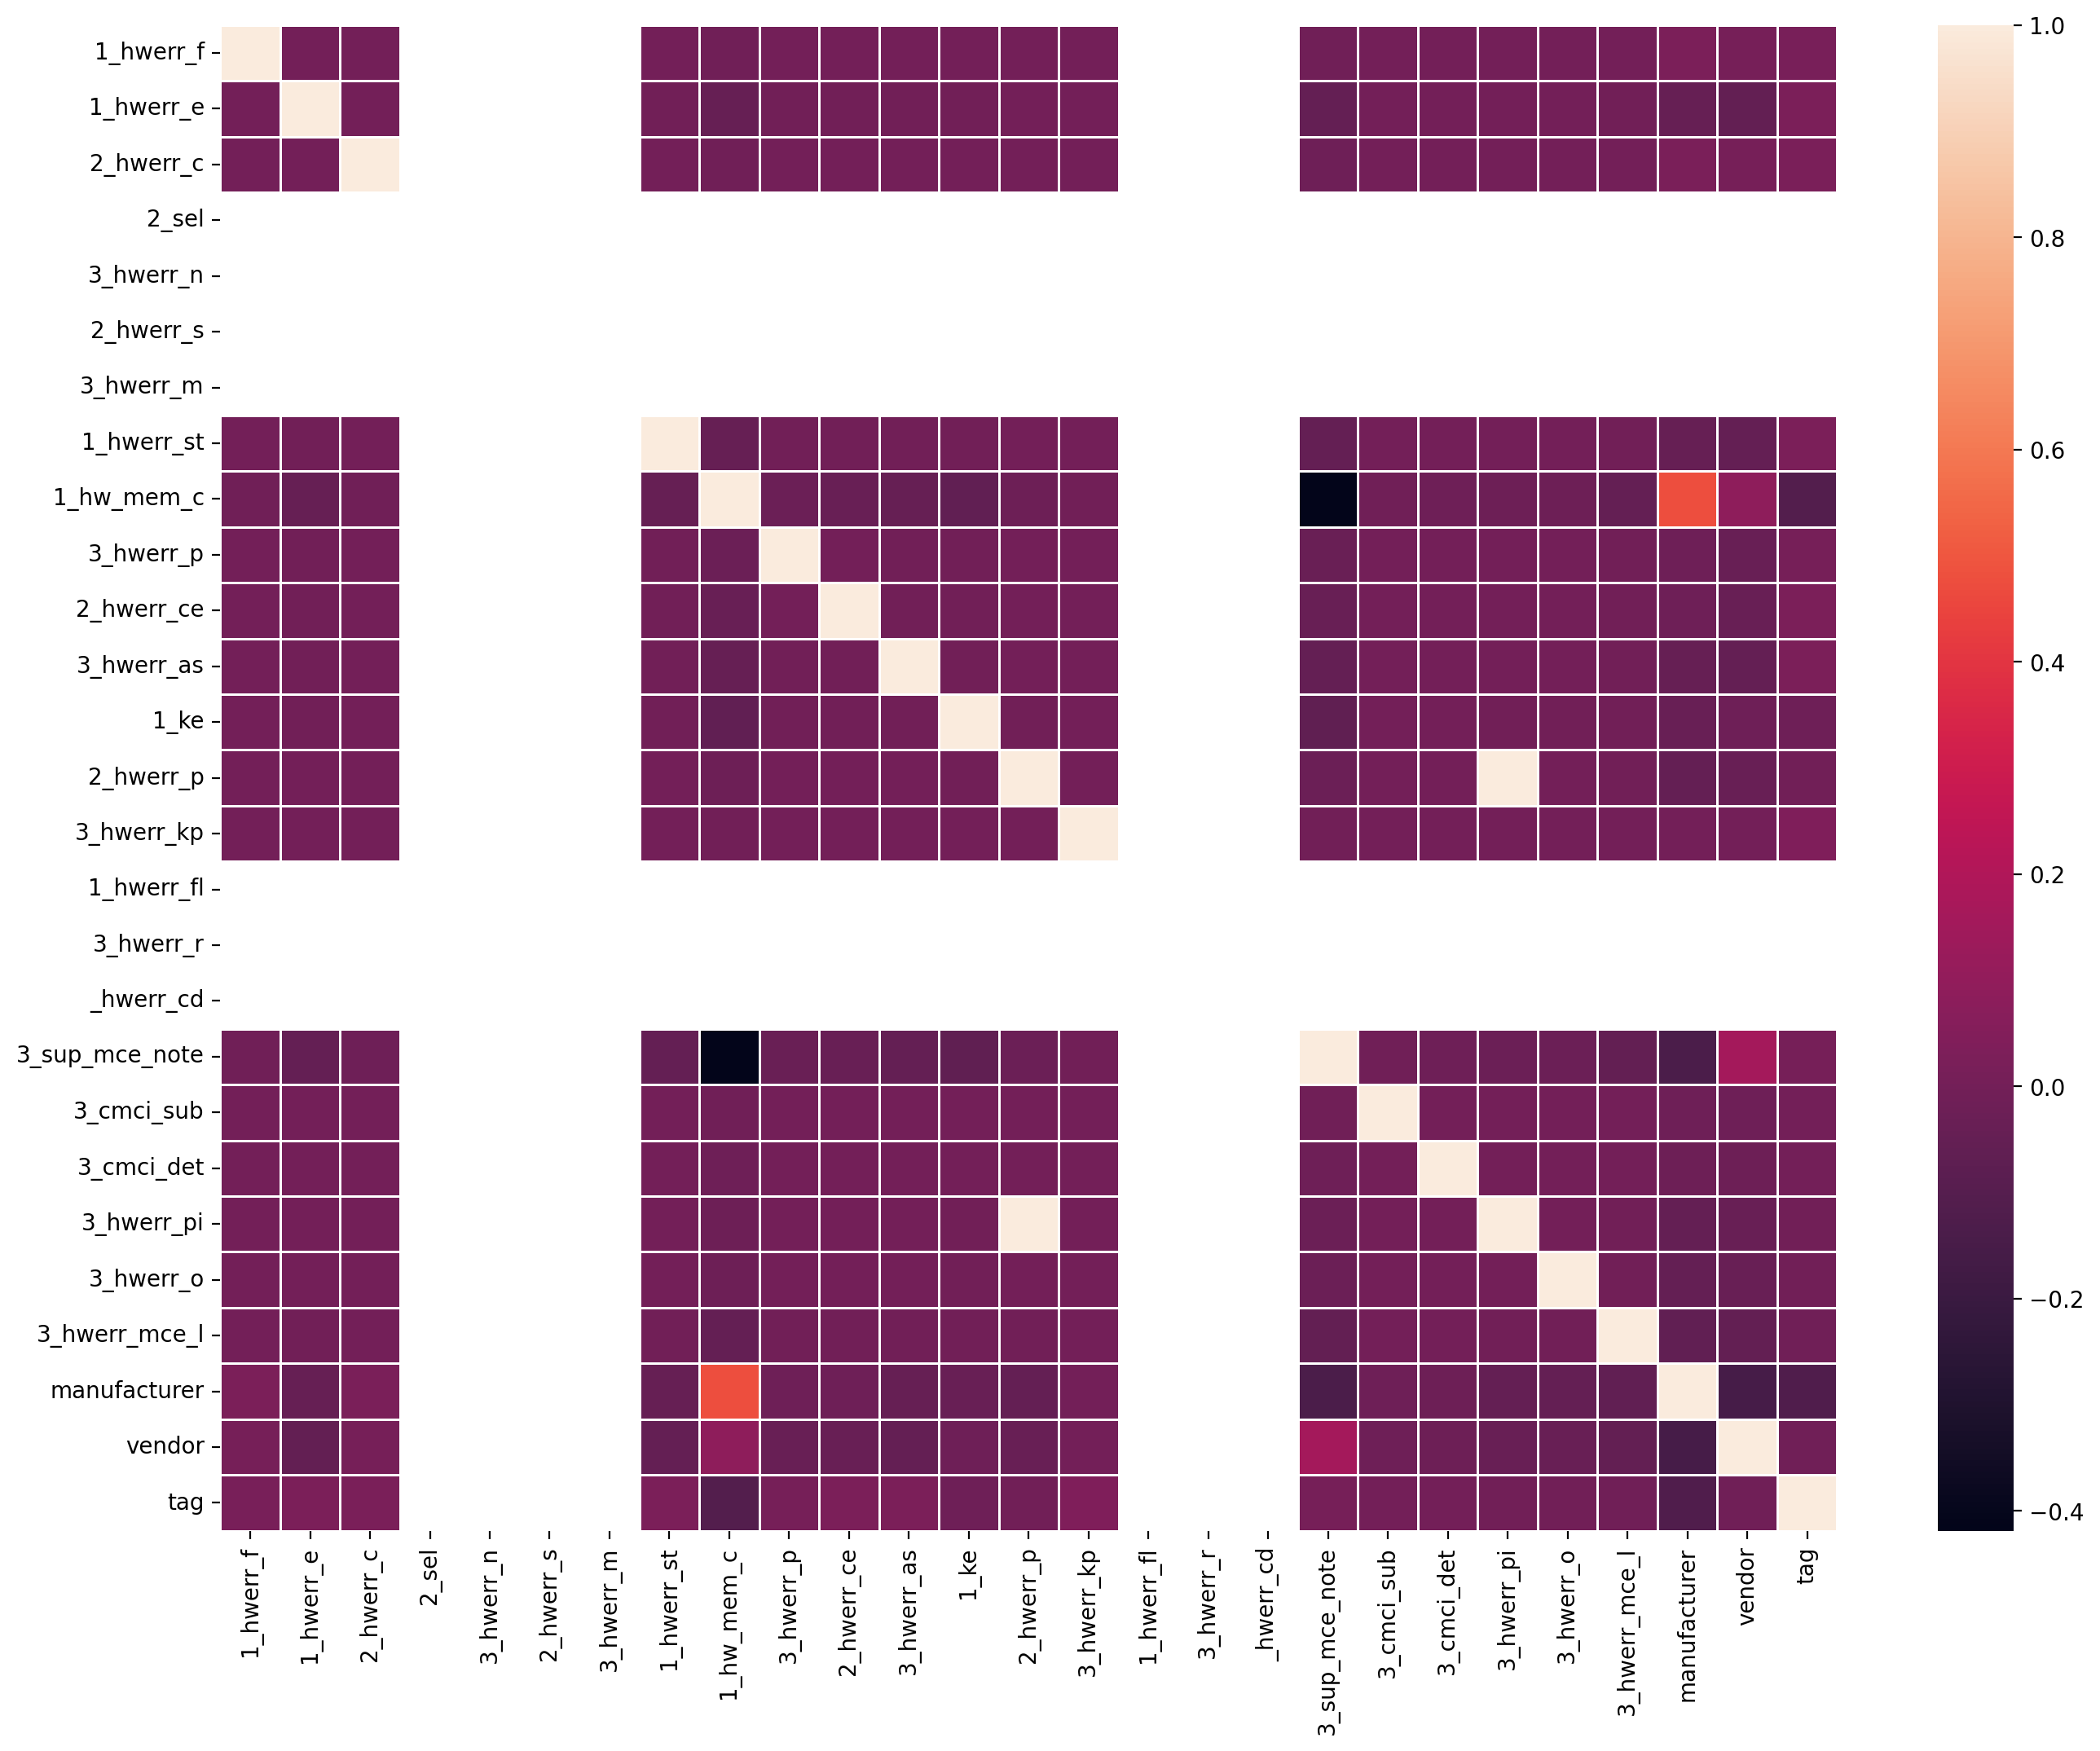

In [11]:
# 相关性分析
plt.figure(figsize=(16,12),dpi=200)
sns.heatmap(data.corr('spearman',numeric_only=True),linewidths=1)

In [12]:
# 构造特征
# 报错时间
a = pd.to_datetime(data['failure_time']) - pd.to_datetime(data['collect_time'])
data['err_time'] = a.dt.seconds/60
data['err_time']

0          33.500000
1          32.466667
2          26.666667
3          22.566667
4          20.383333
             ...    
3511854    12.800000
3511859    12.800000
3511860    12.800000
3511861    10.583333
3511862     9.666667
Name: err_time, Length: 2557038, dtype: float64

In [13]:
# 报错行
data['err'] = (~data['err_time'].isna()).astype('int')
data['err'].value_counts()

0    2435730
1     121308
Name: err, dtype: int64

## 测试数据处理

In [7]:
# 整理列
serial_number = test_kernel['serial_number']
test_kernel.drop('serial_number',axis=1,inplace=True)
test_kernel.insert(0,'serial_number',serial_number)

In [10]:
# 重复列
test_kernel.duplicated().sum()

108067

In [13]:
# 删除重复
test_kernel.drop_duplicates(inplace=True)
test_kernel.duplicated().sum()

0

In [14]:
# 缺失值
test_kernel.isna().sum()

serial_number          0
collect_time           0
1_hwerr_f         155729
1_hwerr_e         155049
2_hwerr_c         155629
2_sel             155810
3_hwerr_n         155810
2_hwerr_s         155810
3_hwerr_m         155810
1_hwerr_st        155087
1_hw_mem_c        155808
3_hwerr_p         155617
2_hwerr_ce        155111
3_hwerr_as        155092
1_ke              154136
2_hwerr_p         155687
3_hwerr_kp        155789
1_hwerr_fl        155810
3_hwerr_r         155810
_hwerr_cd         155810
3_sup_mce_note     92261
3_cmci_sub        155762
3_cmci_det        155755
3_hwerr_pi        155687
3_hwerr_o         155687
3_hwerr_mce_l     154205
manufacturer           0
vendor                 2
dtype: int64

In [15]:
test_kernel.fillna(0,inplace=True)
test_kernel.isna().sum()

serial_number     0
collect_time      0
1_hwerr_f         0
1_hwerr_e         0
2_hwerr_c         0
2_sel             0
3_hwerr_n         0
2_hwerr_s         0
3_hwerr_m         0
1_hwerr_st        0
1_hw_mem_c        0
3_hwerr_p         0
2_hwerr_ce        0
3_hwerr_as        0
1_ke              0
2_hwerr_p         0
3_hwerr_kp        0
1_hwerr_fl        0
3_hwerr_r         0
_hwerr_cd         0
3_sup_mce_note    0
3_cmci_sub        0
3_cmci_det        0
3_hwerr_pi        0
3_hwerr_o         0
3_hwerr_mce_l     0
manufacturer      0
vendor            0
dtype: int64

# 导出数据

In [14]:
data.to_csv('../../数据/生成/预处理后训练数据.csv',index=False)

In [16]:
test_kernel.to_csv('../../数据/生成/预处理后测试数据.csv',index=False)